In [2]:
def euler(f_func, x_0, t_max, dt, I = None):
  x = np.zeros(np.int64(t_max//dt))
  t = np.arange(0,t_max,dt)
  x[0] = x_0
  if I is None:
    for i in range(0,np.int64(t_max/dt)-2):
      x[i+1]=x[i]+f_func(x[i],t[i])*dt
    return x,t
  else:
    for i in range(0,np.int64(t_max/dt)-2):
      x[i+1]=x[i]+f_func(x[i],t[i], I[i])*dt 
    return x,t 

In [3]:
def func_1num(x,t):
  return -x

def func_2num(x,t):
    return x**(-1)

def func_3num(x,t):
    return 1-x

def func_4num(x,t):
    return x*(1-x)

In [4]:
def func_1ana(t):
    return np.exp(-t)

def func_2ana(t):
    return np.sqrt(2*t+1)

def func_3ana(t):
    return -np.exp(-t) + 1

def func_4ana(t):
    return np.exp(t)/(np.exp(t)+1)


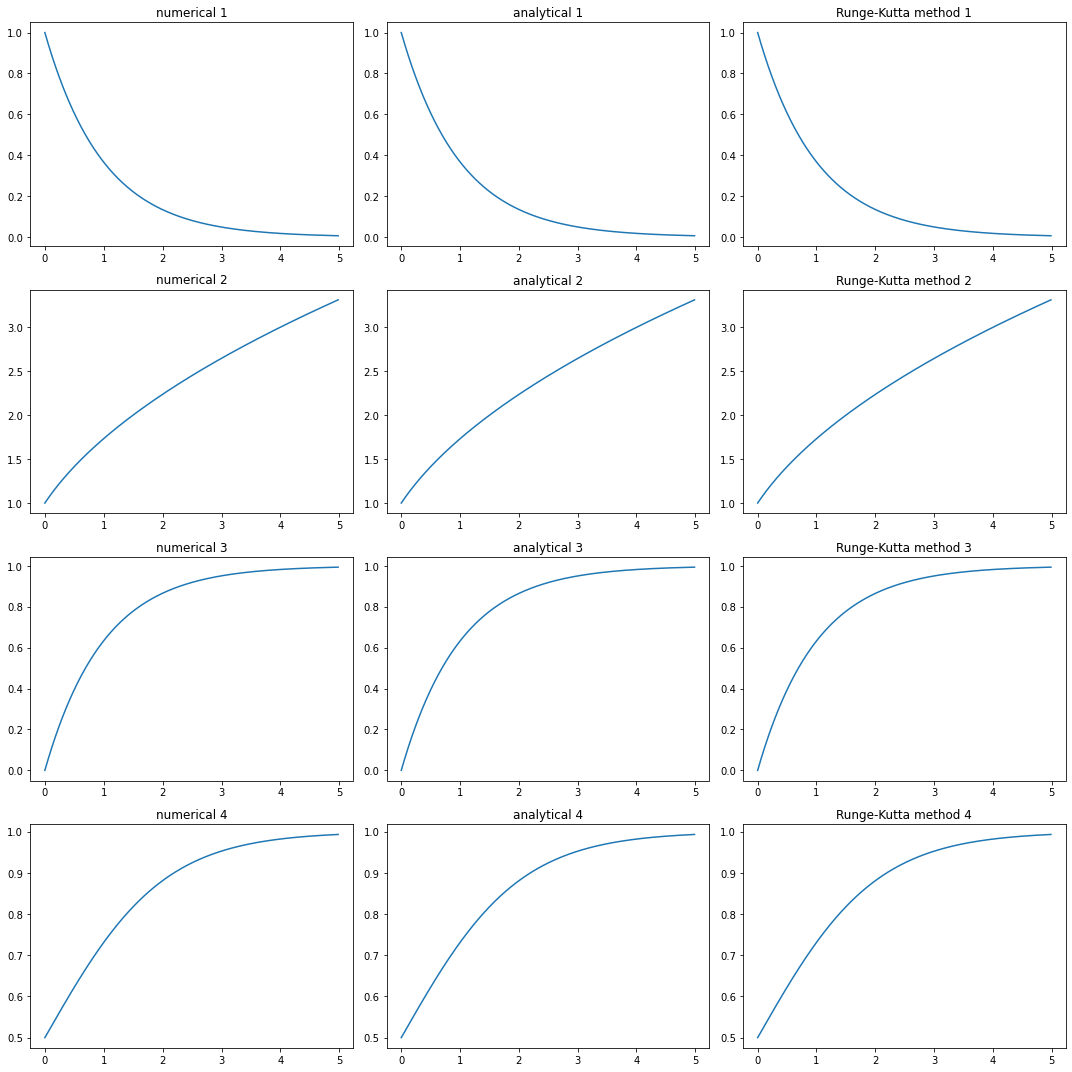

In [5]:
#numerical Euler method defining ODE
xnum1,t = euler(func_1num, 1, 5, 0.01)
xana1 = func_1ana(t)
xrkmeth1 = integrate.odeint(func_1num, 1, t)
xnum2,t = euler(func_2num, 1, 5, 0.01)
xana2 = func_2ana(t)
xrkmeth2 = integrate.odeint(func_2num, 1, t)
xnum3,t = euler(func_3num, 0, 5, 0.01)
xana3 = func_3ana(t)
xrkmeth3 = integrate.odeint(func_3num, 0, t)
xnum4,t = euler(func_4num, 0.5, 5, 0.01)
xana4 = func_4ana(t)
xrkmeth4 = integrate.odeint(func_4num, 0.5, t)

fig, axs = plt.subplots(4, 3, figsize = (15,15))
plt.title("Comparison Analytical and Numerical solutions")
axs[0, 0].plot(t[:-1], xnum1)
axs[0, 0].set_title("numerical 1")
axs[0, 1].plot(t, xana1)
axs[0, 1].set_title("analytical 1")
axs[0, 2].plot(t, xrkmeth1)
axs[0, 2].set_title("Runge-Kutta method 1")
axs[1, 0].plot(t[:-1], xnum2)
axs[1, 0].set_title("numerical 2")
axs[1, 1].plot(t, xana2)
axs[1, 1].set_title("analytical 2")
axs[1, 2].plot(t, xrkmeth2)
axs[1, 2].set_title("Runge-Kutta method 2")
axs[2, 0].plot(t[:-1], xnum3)
axs[2, 0].set_title("numerical 3")
axs[2, 1].plot(t, xana3)
axs[2, 1].set_title("analytical 3")
axs[2, 2].plot(t, xrkmeth3)
axs[2, 2].set_title("Runge-Kutta method 3")
axs[3, 0].plot(t[:-1], xnum4)
axs[3, 0].set_title("numerical 4")
axs[3, 1].plot(t, xana4)
axs[3, 1].set_title("analytical 4")
axs[3, 2].plot(t, xrkmeth4)
axs[3, 2].set_title("Runge-Kutta method 4")
fig.tight_layout()

In [6]:
Rm = 10**7
I1 = 10**-9
taum = 10*10**-3
Em = -80*10**-3


In [7]:
t

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [8]:
def passmembeq(V,t,I):
    return -V/taum + Em/taum + Rm*I/taum

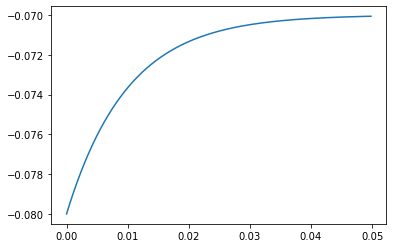

In [9]:
V,t = euler(passmembeq,Em,0.05,0.0001, I = np.full(np.size(t),I1))
plt.plot(t[:-1],V[:-1]);

In [10]:
def sinus(I0,v,t):
    return I0*np.sin(2*math.pi*v*t)

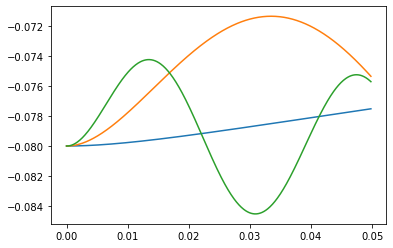

In [11]:
I0 = 10**-9
for v in np.array([1,10,30]):
    I = sinus(I0,v,t)
    V2,t = euler(passmembeq,Em,0.05,0.0001,I)
    plt.plot(t[:-1],V2[:-1]);

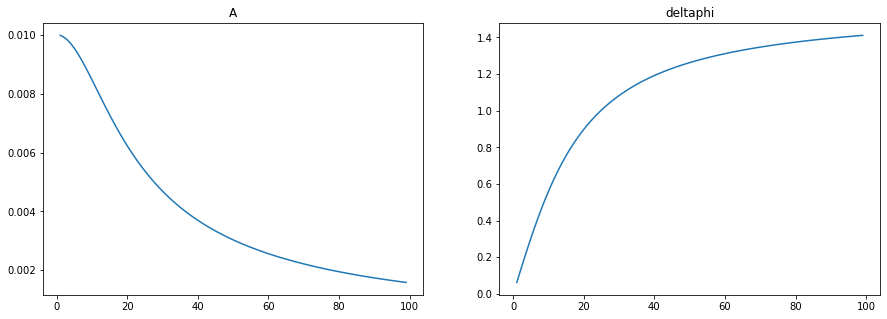

In [12]:
A = np.zeros(np.size(np.arange(1,100)))
dphi = np.zeros(np.size(np.arange(1,100)))
for v in np.arange(1,100):
    A[v-1] = I0*Rm*np.sqrt(1/(1+(2*math.pi*v*taum)**2))
    dphi[v-1] = np.arctan(2*math.pi*v*taum)
fig, axs = plt.subplots(1, 2, figsize = (15,5))
plt.title("Comparison Analytical and Numerical solutions")
axs[0].plot(np.arange(1,100), A)
axs[0].set_title("A")
axs[1].plot(np.arange(1,100), dphi)
axs[1].set_title("deltaphi");